# Import software libraries and load the dataset #

In [2]:
import sys                             # Read system parameters.
import numpy as np                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                    # Manipulate and analyze data.
import matplotlib as mpl               # Create 2D charts.
import matplotlib.pyplot as plt
import seaborn as sns                   # Perform data visualization.
import sklearn                         # Perform data mining and analysis.
from sklearn import datasets

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

Libraries used in this project:
- Python 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.24.3
- pandas 2.1.1
- Matplotlib 3.8.0
- scikit-learn 1.2.2



# Get acquainted with the dataset #

1. Import the iris dataset.
2. Convert the dataset to a dataframe.
    - The rows has the data.
    - Do not forget the column names.
    - Also the target label.
3. Print the first ten rows.

In [3]:
iris = datasets.load_iris()

data = pd.DataFrame(iris.data)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data.columns = iris.feature_names
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
data['target'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Examine a general summary of statistics

In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

# Identify outliers

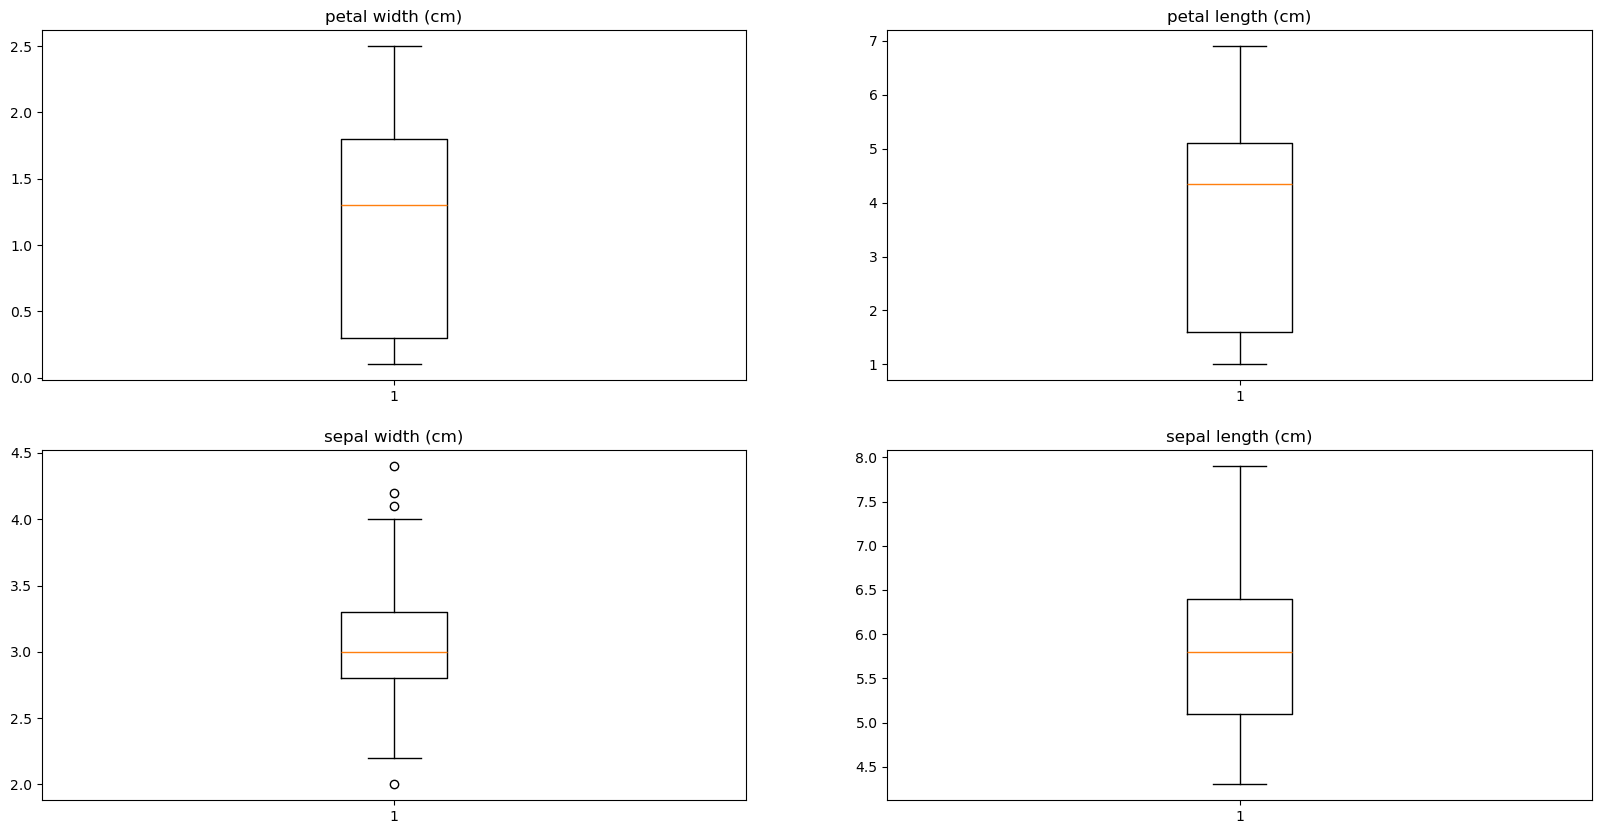

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

axs[0, 0].boxplot(data['petal width (cm)'])
axs[0, 0].set_title('petal width (cm)')

axs[0, 1].boxplot(data['petal length (cm)'])
axs[0, 1].set_title('petal length (cm)')

axs[1, 0].boxplot(data['sepal width (cm)'])
axs[1, 0].set_title('sepal width (cm)')

axs[1, 1].boxplot(data['sepal length (cm)'])
axs[1, 1].set_title('sepal length (cm)')

plt.show();

In [11]:
def limits(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    print("Upper Bound:",upper)   
    print("Lower Bound:",lower)
    return upper, lower


print('sepal width (cm)')
upper, lower = limits(data['sepal width (cm)'])
outliers = data[(data['sepal width (cm)'] < lower) | (data['sepal width (cm)'] > upper)]
data = data.drop(outliers.index)

sepal width (cm)
Upper Bound: 4.05
Lower Bound: 2.05


{'whiskers': [<matplotlib.lines.Line2D at 0x225c954a2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x225c954bb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225c9539890>],
 'medians': [<matplotlib.lines.Line2D at 0x225c9555050>],
 'fliers': [<matplotlib.lines.Line2D at 0x225c9555b50>],
 'means': []}

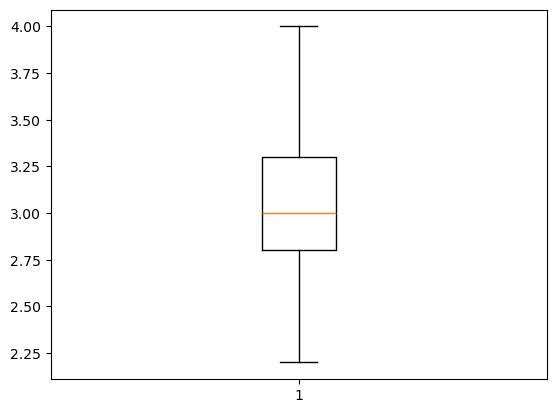

In [12]:
plt.boxplot(data['sepal width (cm)'])

# Reduce the dimensionality of the dataset

- We want just two classes of the target label.

In [13]:
data['target'].value_counts()

target
2    50
1    49
0    47
Name: count, dtype: int64

In [14]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

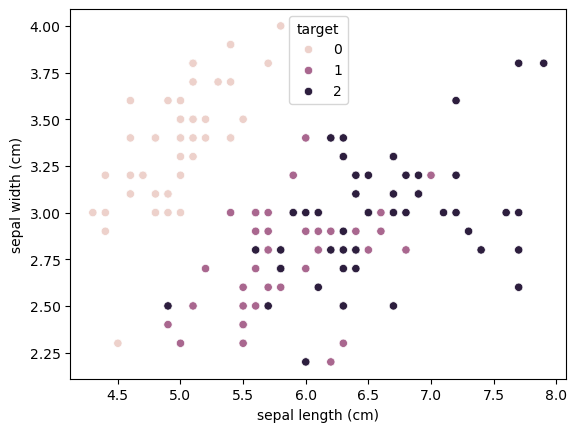

In [15]:
import seaborn as sns
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue= data['target'])

i will keep class 0 and 1, as 1 and 2 overlap

In [16]:
data.drop(data[data.target == 2].index, inplace=True)

In [17]:
data['target'].value_counts()

target
1    49
0    47
Name: count, dtype: int64

# Examine the separation between classes using a scatter plot

- Sepal length along x-axis, sepal width along y-axis.

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

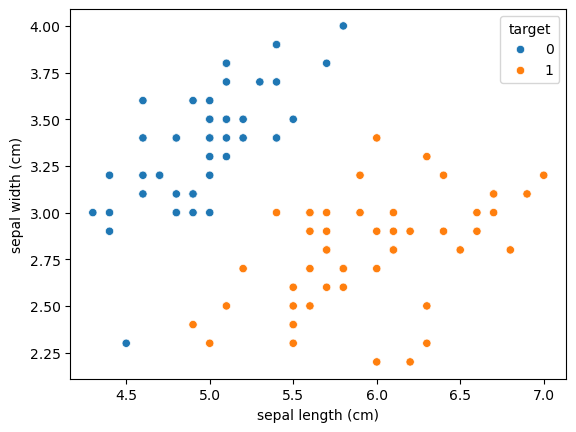

In [19]:
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue= data['target'])

# Plot a decision boundary for a given model

In [73]:
def DecisionBoundary(weights):
    g =sns.scatterplot(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'],
                  hue=y_train,
                  palette=['darkblue','darkgreen']);

    x1 = (-weights[0] - weights[2] * X_train.iloc[0,1])/weights[1]
    x2 = (-weights[0] - weights[2] * X_train.iloc[1,1])/weights[1]

    return plt.axline((x1, X_train.iloc[0,1]), (x2, X_train.iloc[1,1]), color = "red")

# Train a basic logistic regression model and plot its decision boundary

In [87]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = data[['sepal length (cm)', 'sepal width (cm)']]
Y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, Y , random_state=42, test_size=0.20, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

logi = LogisticRegression(random_state=0).fit(X_train, y_train)

In [88]:
print(logi.coef_)
print(logi.intercept_)

[[ 2.91656441 -2.56109099]]
[-7.77789917]


In [89]:
logi.score(X_test, y_test)

1.0

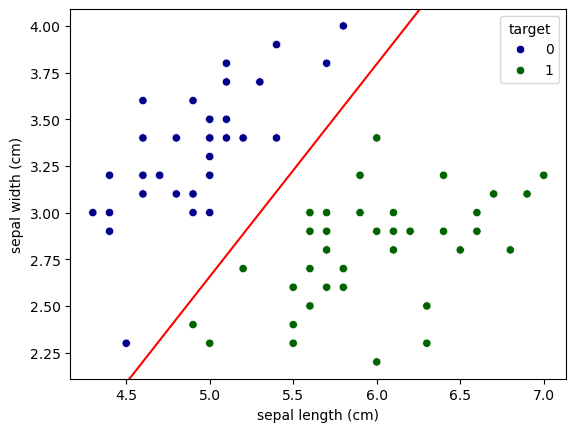

In [90]:
weights = [logi.intercept_[0], logi.coef_[0,0], logi.coef_[0,1]]
DecisionBoundary(weights)

In [91]:
X_train.iloc[:, 0]

43    5.0
71    6.1
16    5.4
72    6.3
92    5.8
     ... 
64    5.6
75    6.6
14    5.8
96    5.7
54    6.5
Name: sepal length (cm), Length: 76, dtype: float64

# Train an SVM model and plot its decision boundary plus margins

- Make the C parameter = 100.

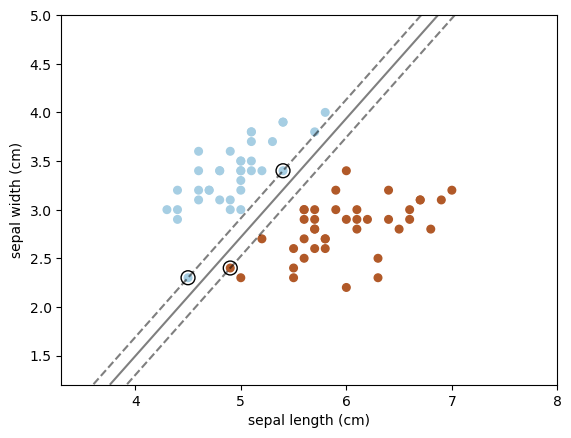

In [93]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

svm = SVC(kernel='linear', C=100)
svm.fit(X_train, y_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()


# Reduce the regularization penalty to soften the margin

- Make the C parameter = 0.1

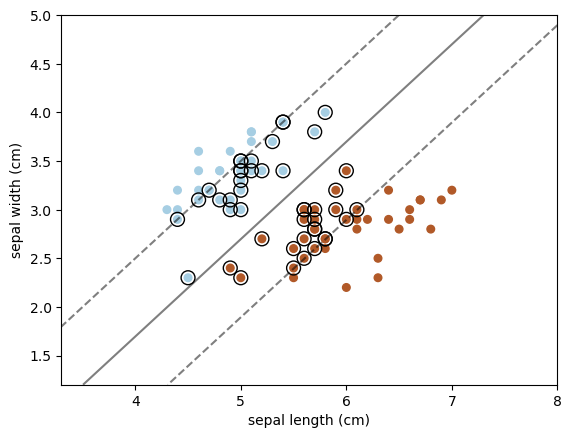

In [94]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

svm = SVC(kernel='linear', C=0.1)
svm.fit(X_train, y_train)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

# Split the datasets

In [105]:
X = data.drop(columns = "target", axis=1)
Y = data["target"]
Y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, Y , random_state=42, test_size=0.20, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76, 4), (20, 4), (76,), (20,))

In [109]:
svm = SVC(kernel='linear', C=0.1)
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

# Evaluate an SVM model using a holdout test set

In [110]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score)

In [111]:
y_pred = svm.predict(X_test)

print('The accuracy of the model : ', accuracy_score(y_test, y_pred) )
print('The precision of the model : ', precision_score(y_test, y_pred) )
print('The recall of the model : ', recall_score(y_test, y_pred) )
print('The f1 score of the model : ', f1_score(y_test, y_pred) )

The accuracy of the model :  1.0
The precision of the model :  1.0
The recall of the model :  1.0
The f1 score of the model :  1.0
